# Config

In [1]:

from PIL import Image
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from datasets import load_dataset

# View

In [2]:
file_path = "E:/DL-for-Knee-decease-diagnosis/dataset/train/normal/9001695L.png"
file_size_bytes = os.path.getsize(file_path)
file_size_kb = file_size_bytes / 1024  # Chuyển đổi sang kilobytes

print(f"Size: {file_size_kb:.2f} KB ({file_size_bytes} bytes)")

Size: 18.36 KB (18797 bytes)


In [3]:
image_color = cv.imread(file_path, cv.IMREAD_COLOR)


In [4]:
image_color.shape

(224, 224, 3)

In [5]:
image_color.size 

150528

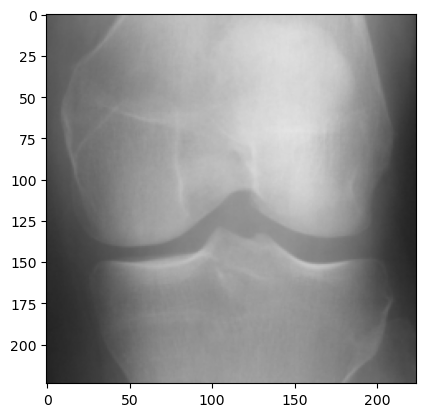

In [6]:
plt.imshow(image_color)

In [7]:
dataset_path = 'E:/DL-for-Knee-decease-diagnosis/smallData_train/'

train_dataset = load_dataset("imagefolder", data_dir=dataset_path)

Resolving data files:   0%|          | 0/20 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [8]:
train_dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 20
    })
})

In [9]:
# Chọn một file ảnh từ folder "normal"
image_path = os.path.join(dataset_path, 'normal', os.listdir(os.path.join(dataset_path, 'normal'))[0])

# Mở ảnh bằng PIL
# image = Image.open(image_path)
image = cv.imread(image_path, cv.IMREAD_COLOR)

print(f"Shape: {image.shape}")
# In kích thước của ảnh (chiều rộng, chiều cao)
print(f"Kích thước ảnh: {image.size}")

file_size_bytes = os.path.getsize(image_path)
file_size_kb = file_size_bytes / 1024  # Chuyển đổi sang kilobytes

print(f"Size: {file_size_kb:.2f} KB ({file_size_bytes} bytes)")

Shape: (224, 224, 3)
Kích thước ảnh: 150528
Size: 18.36 KB (18797 bytes)


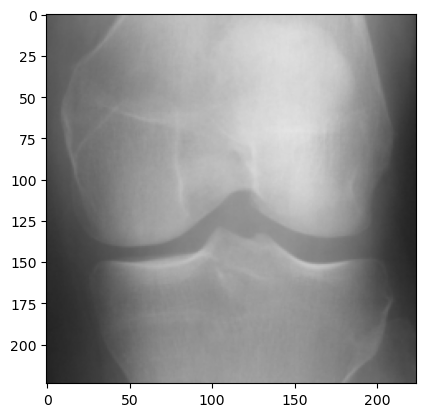

In [10]:
plt.imshow(image)

Shape (xám): (224, 224)


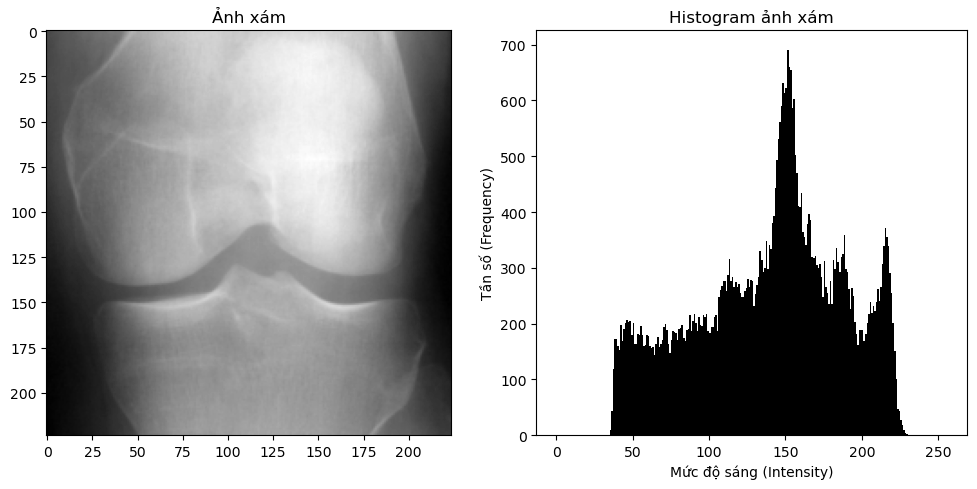

In [11]:
# Bước 1: Chuyển ảnh sang grayscale (ảnh xám)
image_gray = cv.cvtColor(image_color, cv.COLOR_BGR2GRAY)

# Kiểm tra shape của ảnh xám
print(f"Shape (xám): {image_gray.shape}")

# Bước 2: Vẽ biểu đồ histogram cho ảnh grayscale
plt.figure(figsize=(10, 5))

# Vẽ ảnh grayscale
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Ảnh xám')

# Vẽ histogram
plt.subplot(1, 2, 2)
plt.hist(image_gray.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram ảnh xám')
plt.xlabel('Mức độ sáng (Intensity)')
plt.ylabel('Tần số (Frequency)')

plt.tight_layout()
plt.show()

# Histogram


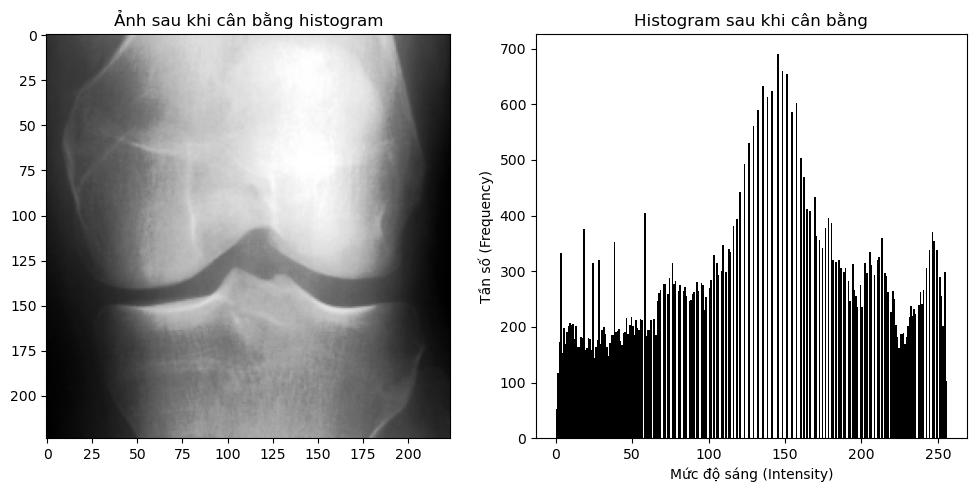

In [12]:
# Cân bằng histogram cho ảnh xám
image_gray_equalized = cv.equalizeHist(image_gray)

# Hiển thị ảnh đã được cân bằng histogram và biểu đồ histogram
plt.figure(figsize=(10, 5))

# Hiển thị ảnh đã cân bằng
plt.subplot(1, 2, 1)
plt.imshow(image_gray_equalized, cmap='gray')
plt.title('Ảnh sau khi cân bằng histogram')

# Vẽ histogram của ảnh đã cân bằng
plt.subplot(1, 2, 2)
plt.hist(image_gray_equalized.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram sau khi cân bằng')
plt.xlabel('Mức độ sáng (Intensity)')
plt.ylabel('Tần số (Frequency)')

plt.tight_layout()
plt.show()


In [ ]:
# Áp dụng CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
image_clahe = clahe.apply(image_gray)

# Hiển thị ảnh CLAHE và histogram
plt.figure(figsize=(10, 5))

# Hiển thị ảnh sau CLAHE
plt.subplot(1, 2, 1)
plt.imshow(image_clahe, cmap='gray')
plt.title('Ảnh sau CLAHE')

# Vẽ histogram của ảnh CLAHE
plt.subplot(1, 2, 2)
plt.hist(image_clahe.ravel(), bins=256, range=[0, 256], color='black')
plt.title('Histogram sau CLAHE')
plt.xlabel('Mức độ sáng (Intensity)')
plt.ylabel('Tần số (Frequency)')

plt.tight_layout()
plt.show()


# Solve

1-------------------------------------------
Image: 9001695L.png
Shape: (224, 224, 3)
Size: 18.36 KB (18797 bytes)


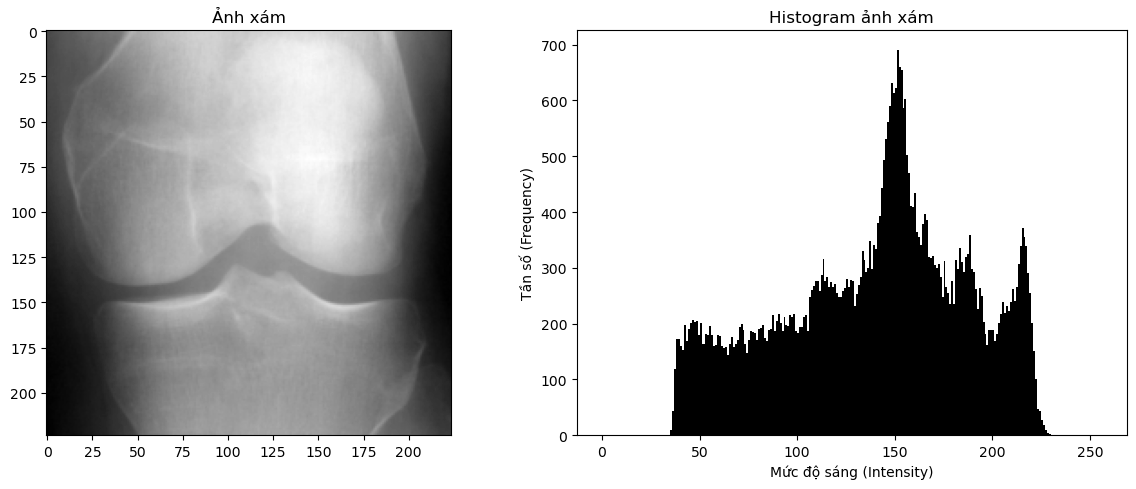

Shape: (224, 224)


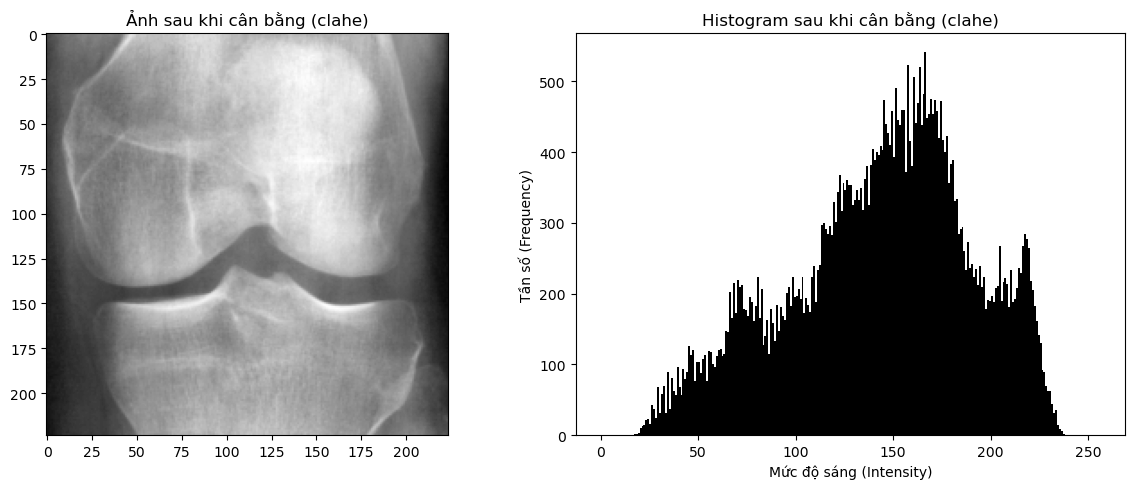

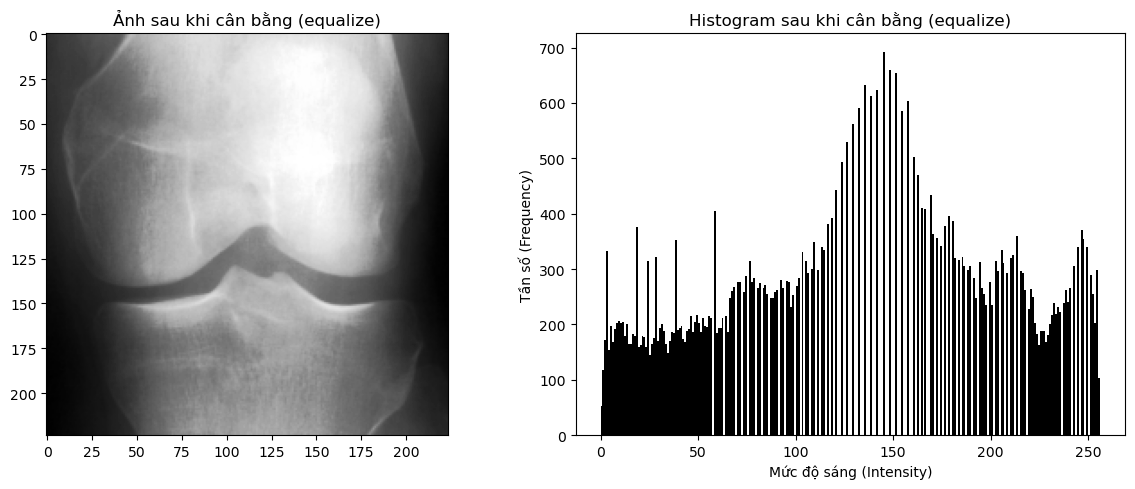

2-------------------------------------------
Image: 9001897L.png
Shape: (224, 224, 3)
Size: 23.59 KB (24161 bytes)


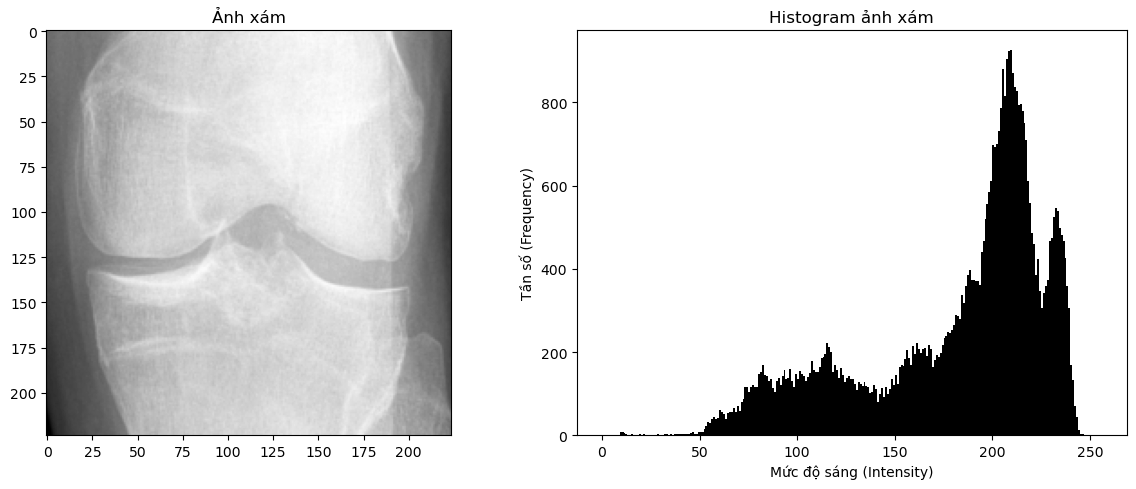

Shape: (224, 224)


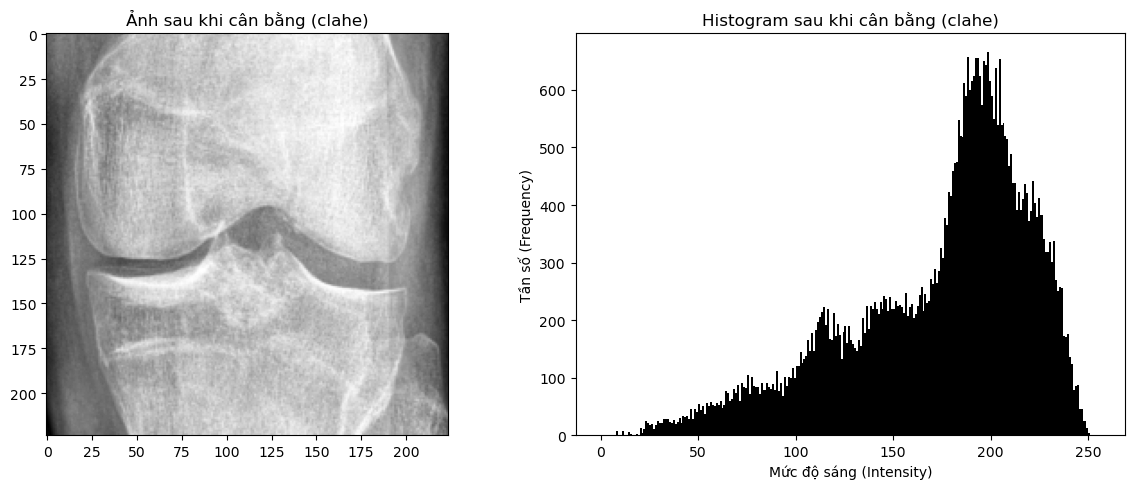

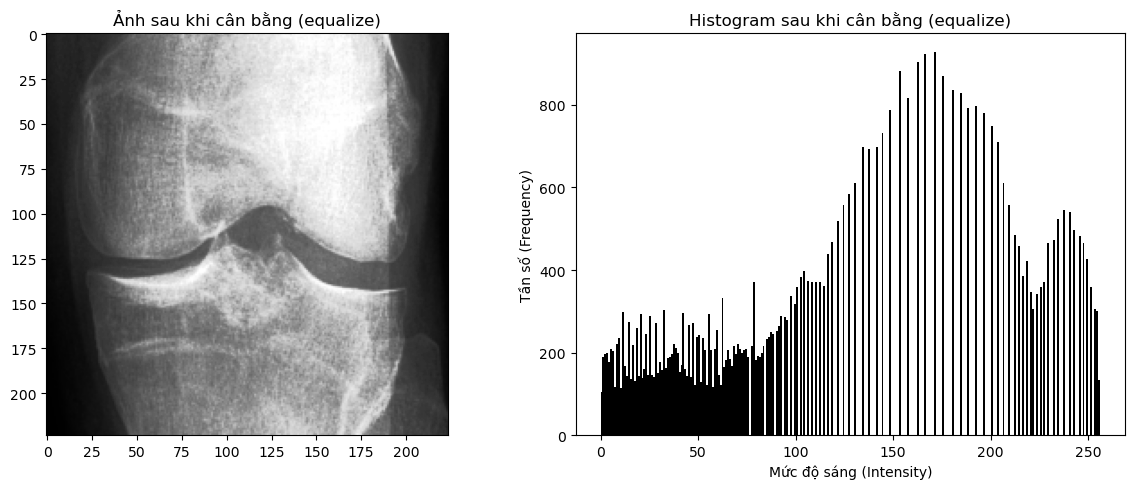

3-------------------------------------------
Image: 9003126L.png
Shape: (224, 224, 3)
Size: 15.31 KB (15681 bytes)


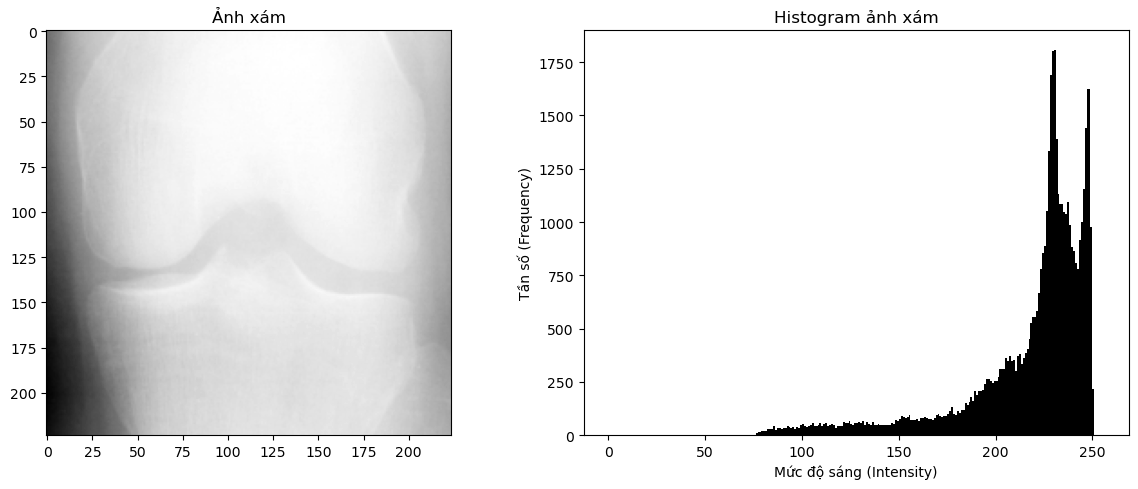

Shape: (224, 224)


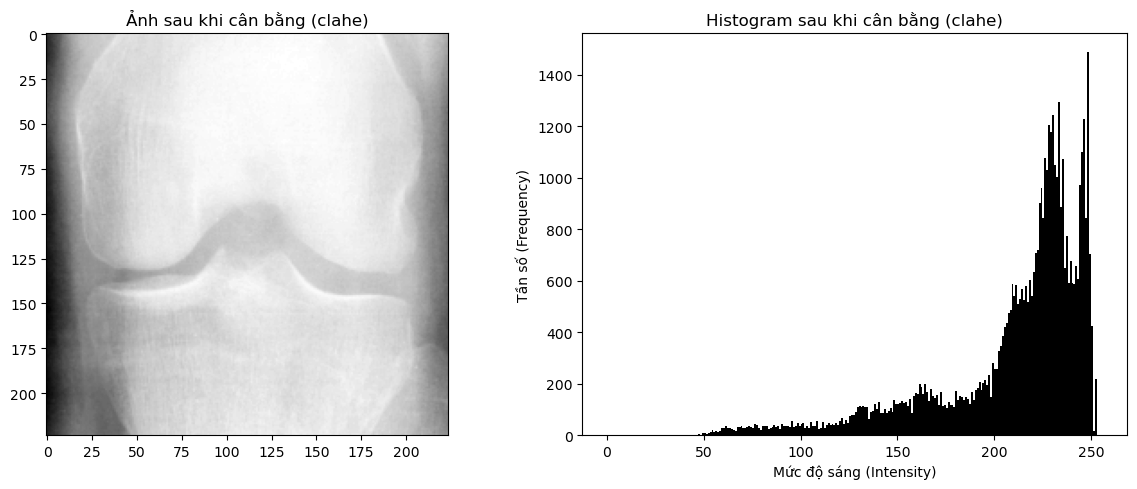

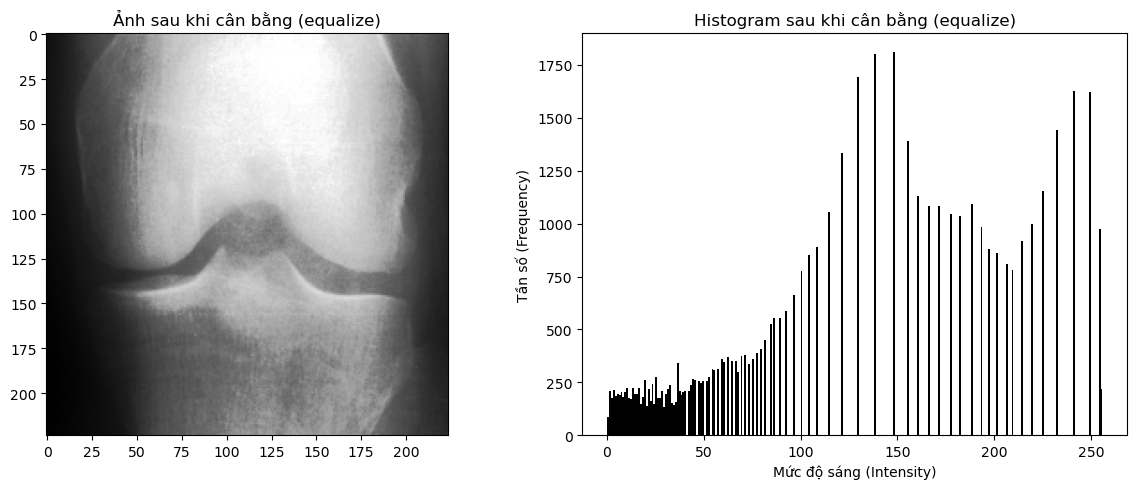

4-------------------------------------------
Image: 9003126R.png
Shape: (224, 224, 3)
Size: 17.42 KB (17835 bytes)


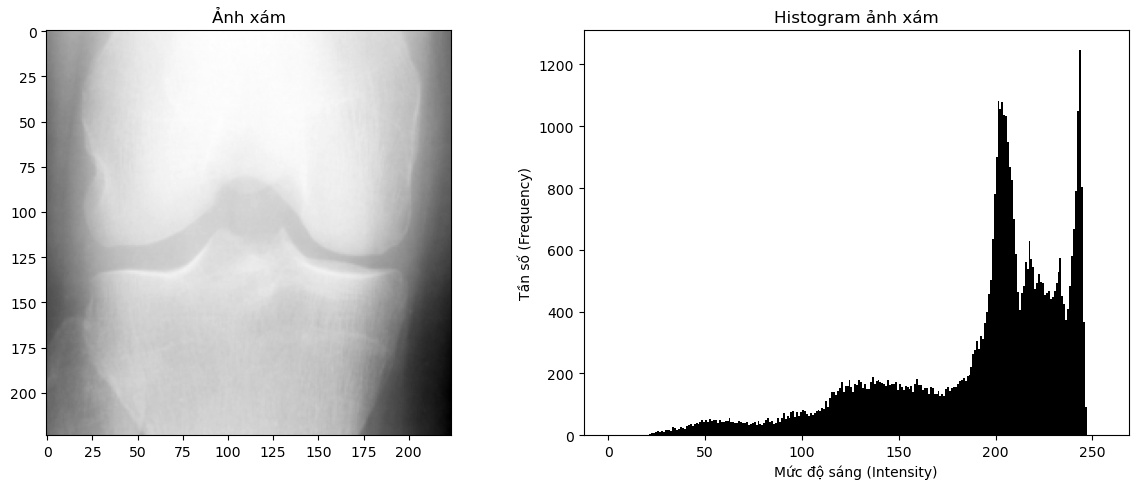

Shape: (224, 224)


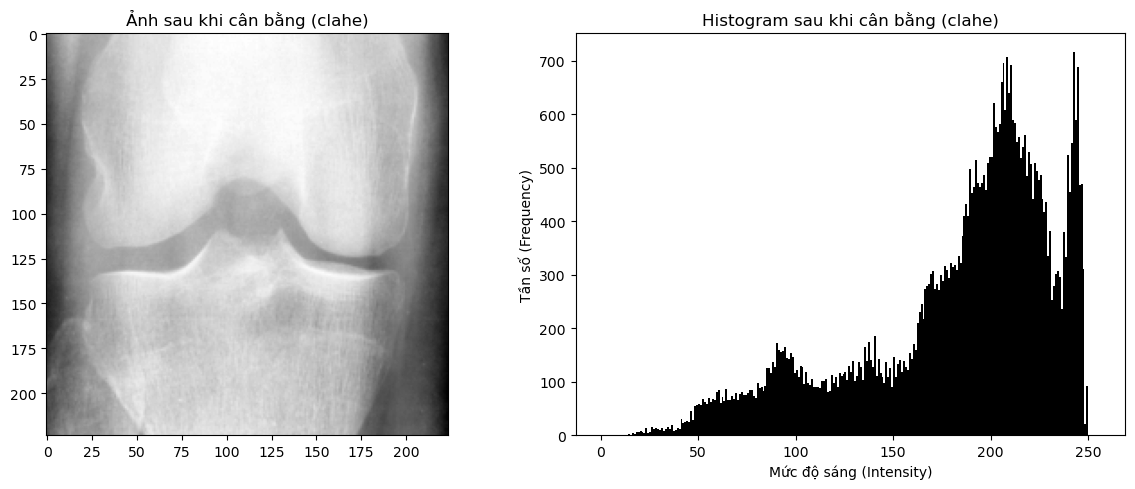

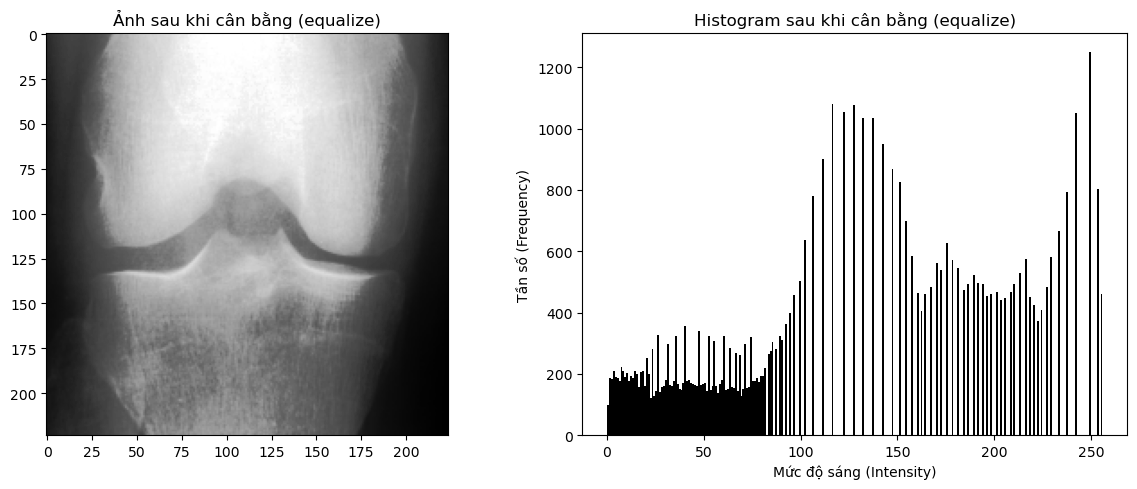

5-------------------------------------------
Image: 9003430L.png
Shape: (224, 224, 3)
Size: 20.32 KB (20811 bytes)


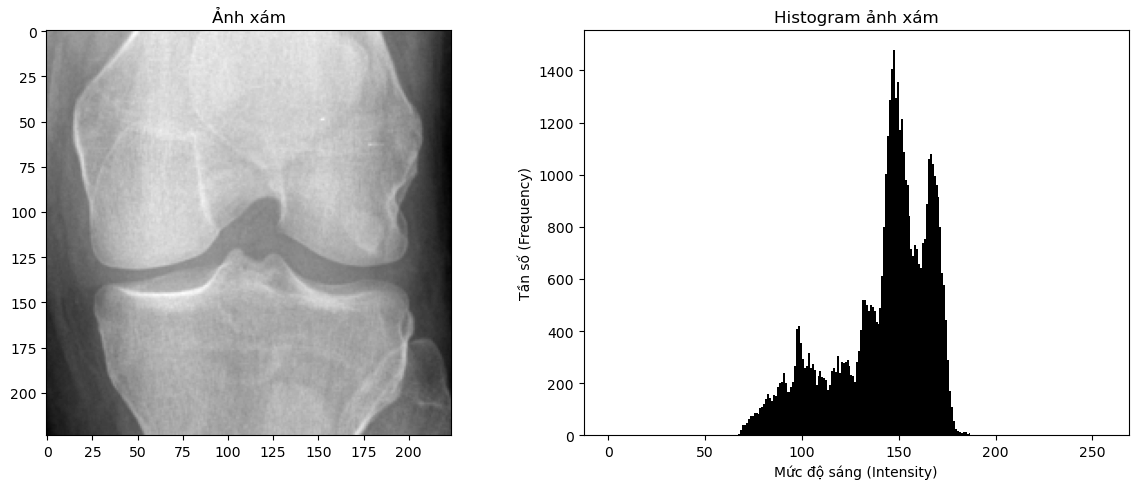

Shape: (224, 224)


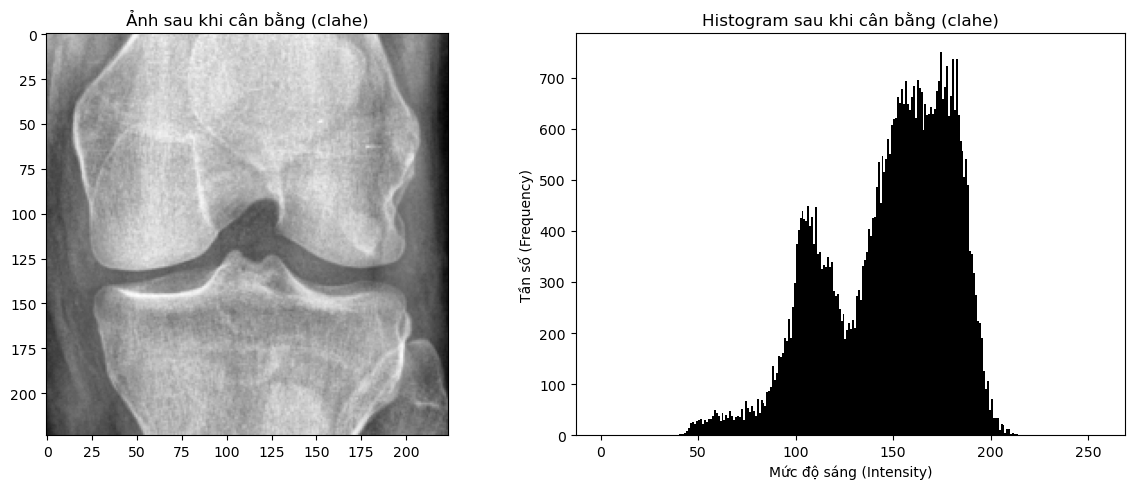

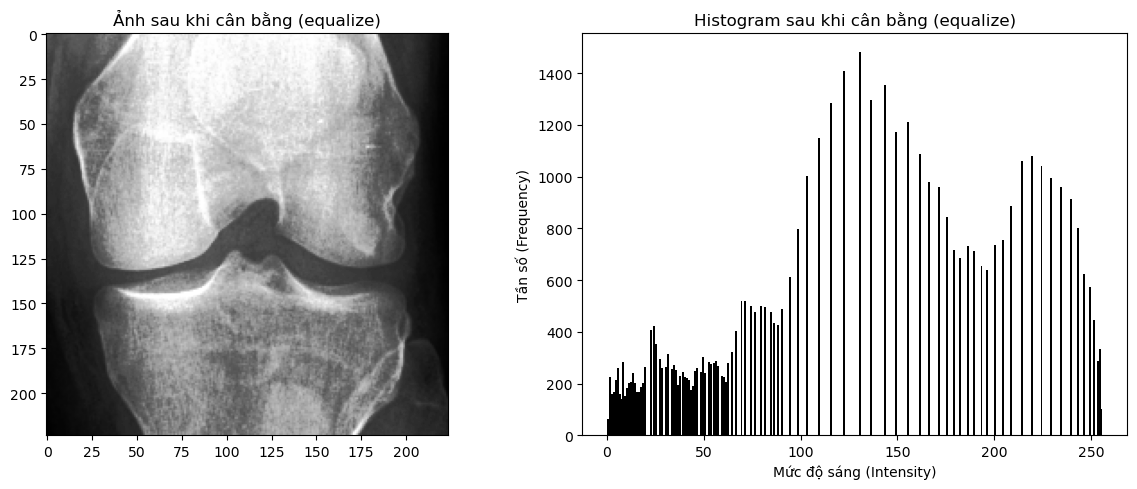

In [27]:
import os
import cv2 as cv
import matplotlib.pyplot as plt

def apply_histogram_equalization(image_gray, method="equalize"):
    """
    Cân bằng histogram của ảnh xám dựa trên phương pháp được chỉ định.
    method: 
        - "equalize" để sử dụng cv.equalizeHist
        - "clahe" để sử dụng Contrast Limited Adaptive Histogram Equalization (CLAHE)
    """
    if method == "equalize":
        return cv.equalizeHist(image_gray)
    elif method == "clahe":
        clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        return clahe.apply(image_gray)
    else:
        raise ValueError("Phương pháp không hợp lệ. Chọn 'equalize' hoặc 'clahe'.")

def plot_image_and_histogram(image, title="Image", histogram_title="Histogram"):
    """
    Hiển thị ảnh và histogram.
    """
    plt.figure(figsize=(12, 5))

    # Hiển thị ảnh
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    
    # Hiển thị histogram
    plt.subplot(1, 2, 2)
    plt.hist(image.ravel(), bins=256, range=[0, 256], color='black')
    plt.title(histogram_title)
    plt.xlabel('Mức độ sáng (Intensity)')
    plt.ylabel('Tần số (Frequency)')
    
    plt.tight_layout()
    plt.show()

def display_images_info(folder_name, num_images, base_path='E:/DL-for-Knee-decease-diagnosis/smallData_train/', equalization_method="equalize"):
    folder_path = os.path.join(base_path, folder_name)
    image_files = os.listdir(folder_path)[:num_images]  # Chỉ lấy số lượng ảnh cần hiển thị
    
    for i, image_file in enumerate(image_files):
        
        print(f"{i+1}-------------------------------------------")
        image_path = os.path.join(folder_path, image_file)
        
        # Đọc ảnh bằng OpenCV
        image = cv.imread(image_path, cv.IMREAD_COLOR)
        image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)  # Chuyển sang grayscale

        # Thông tin về shape và kích thước
        file_size_bytes = os.path.getsize(image_path)
        file_size_kb = file_size_bytes / 1024  # Đổi sang kilobytes
        
        # In thông tin ảnh
        print(f"Image: {image_file}")
        print(f"Shape: {image.shape}")
        print(f"Size: {file_size_kb:.2f} KB ({file_size_bytes} bytes)")

        # Hiển thị ảnh xám và histogram của ảnh xám
        plot_image_and_histogram(image_gray, title="Ảnh xám", histogram_title="Histogram ảnh xám")

        # Áp dụng cân bằng histogram với phương pháp được chọn
        image_gray_equalized = apply_histogram_equalization(image_gray, method=equalization_method)
        print(f"Shape: {image_gray.shape}")
        # Hiển thị ảnh đã cân bằng histogram và histogram của nó
        plot_image_and_histogram(image_gray_equalized, title=f"Ảnh sau khi cân bằng ({equalization_method})", histogram_title=f"Histogram sau khi cân bằng ({equalization_method})")
        
        
        # Áp dụng cân bằng histogram với phương pháp được chọn
        eq = "equalize"
        image_gray_equalized = apply_histogram_equalization(image_gray, method=eq)
        # Hiển thị ảnh đã cân bằng histogram và histogram của nó
        plot_image_and_histogram(image_gray_equalized, title=f"Ảnh sau khi cân bằng ({eq})", histogram_title=f"Histogram sau khi cân bằng ({eq})")
        
        
        

# Sử dụng function để hiển thị thông tin và ảnh với phương pháp cân bằng CLAHE
display_images_info('normal', 5, equalization_method="clahe")


1-------------------------------------------
Image: 9000622L.png
Shape: (224, 224, 3)
Size: 16.74 KB (17141 bytes)


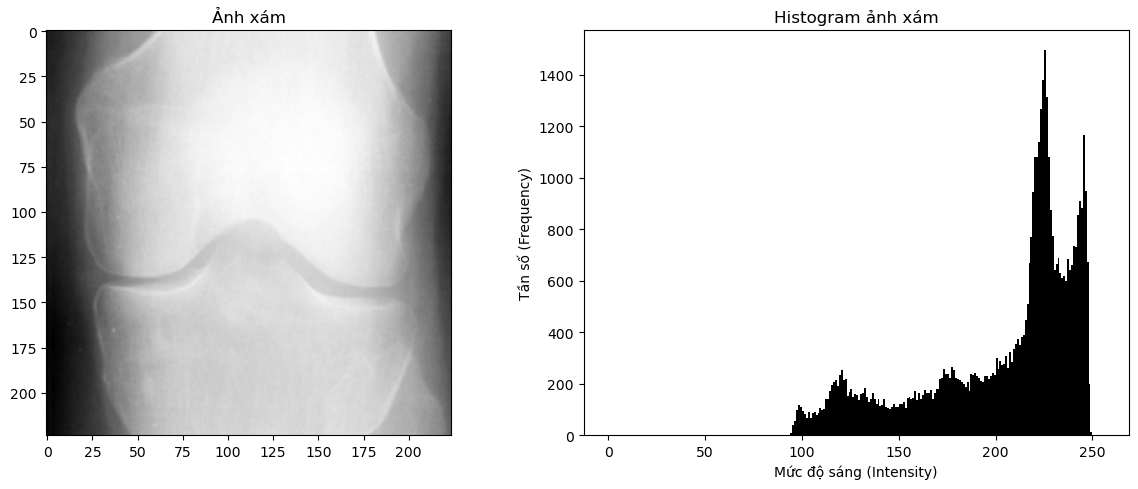

Shape: (224, 224)


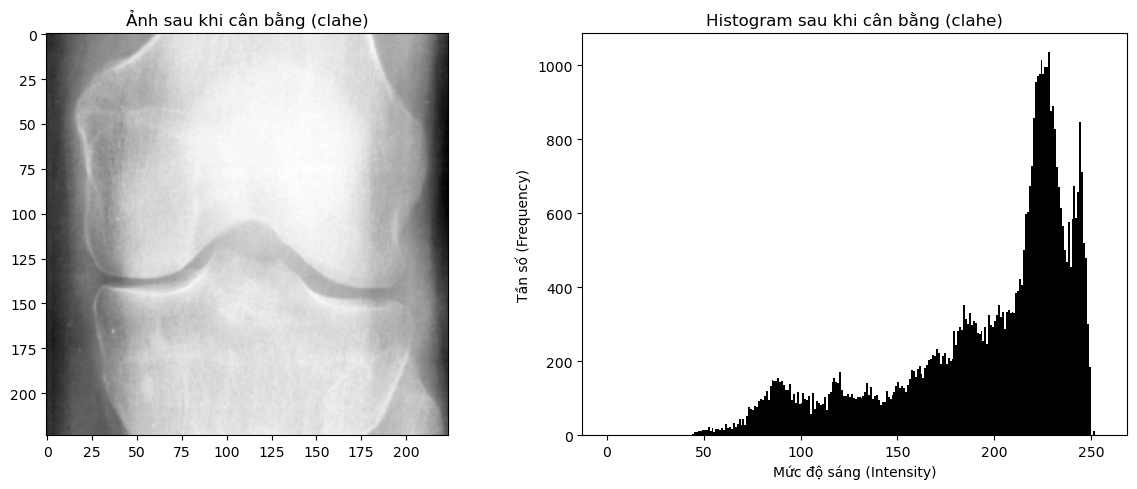

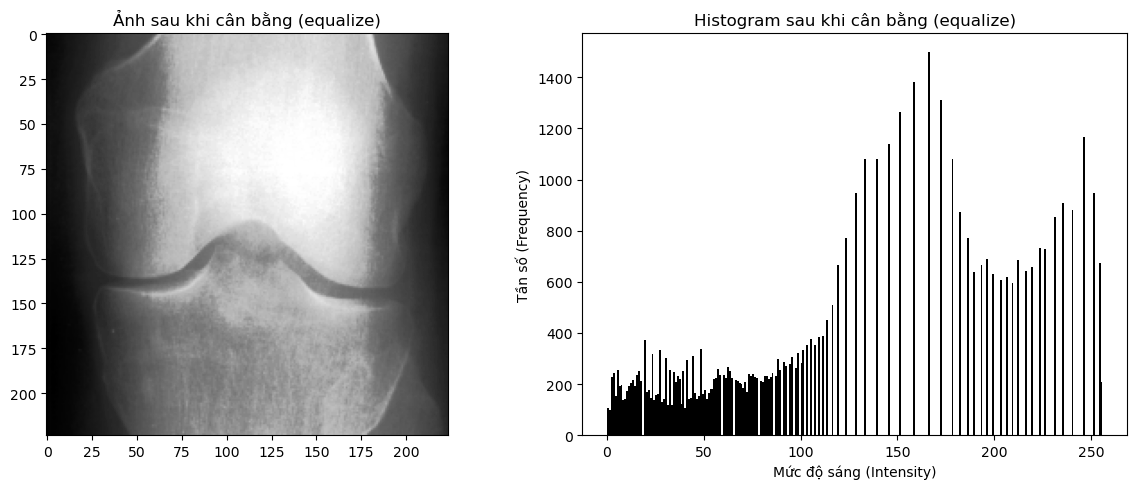

2-------------------------------------------
Image: 9054866R.png
Shape: (224, 224, 3)
Size: 20.99 KB (21491 bytes)


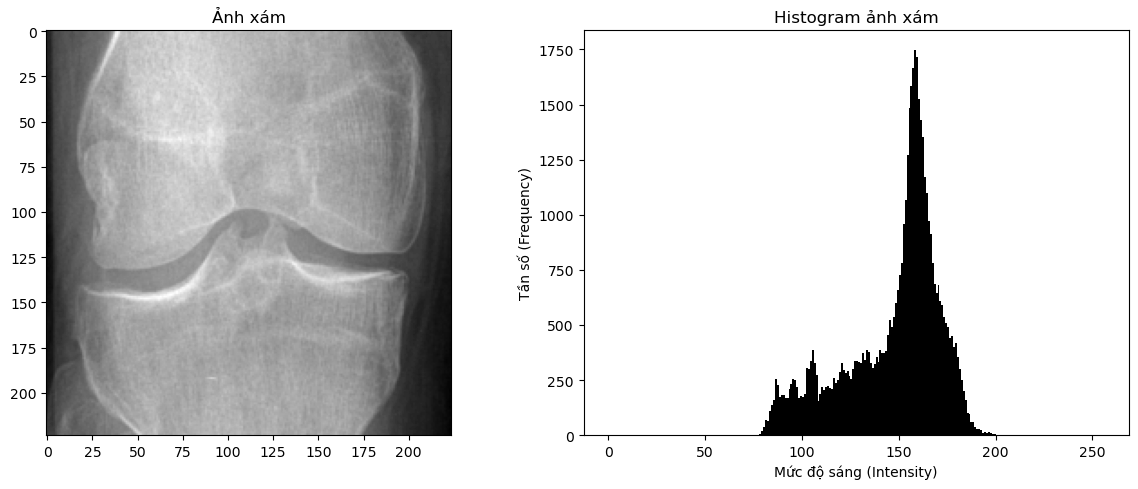

Shape: (224, 224)


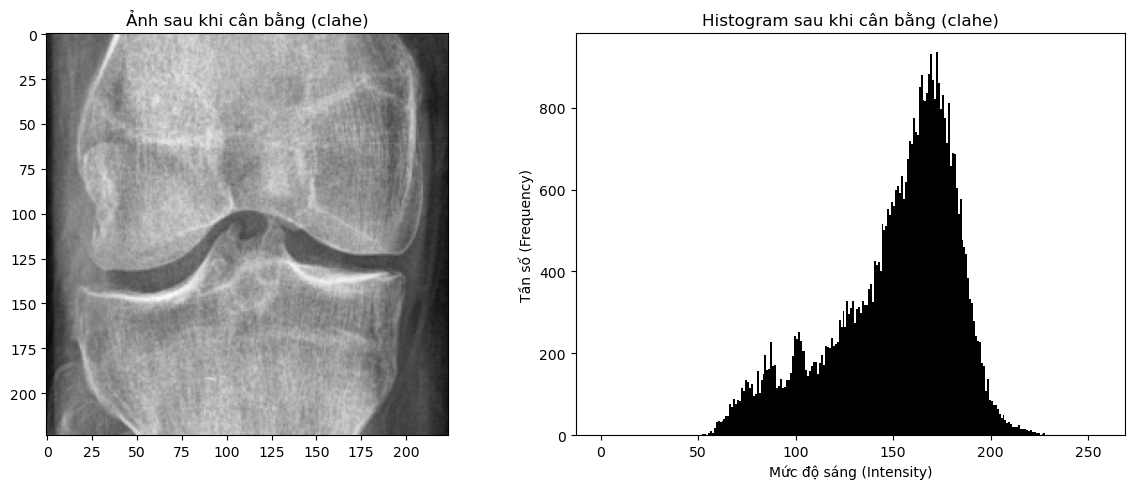

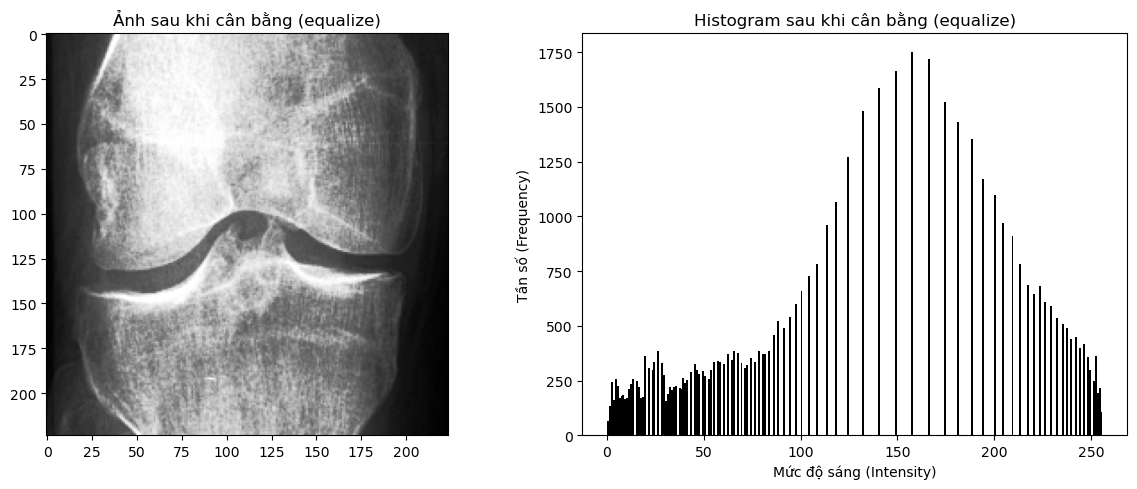

3-------------------------------------------
Image: 9055429L.png
Shape: (224, 224, 3)
Size: 23.29 KB (23853 bytes)


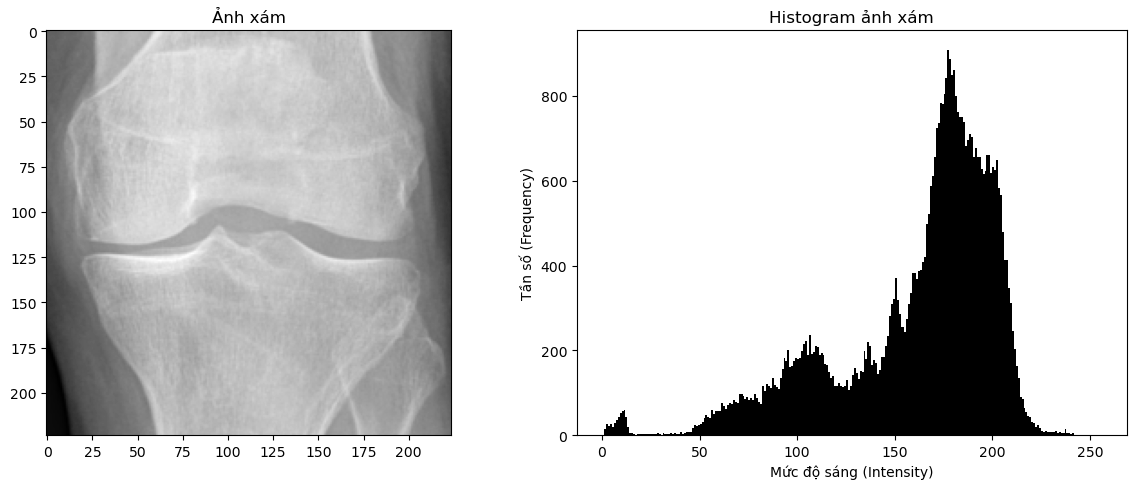

Shape: (224, 224)


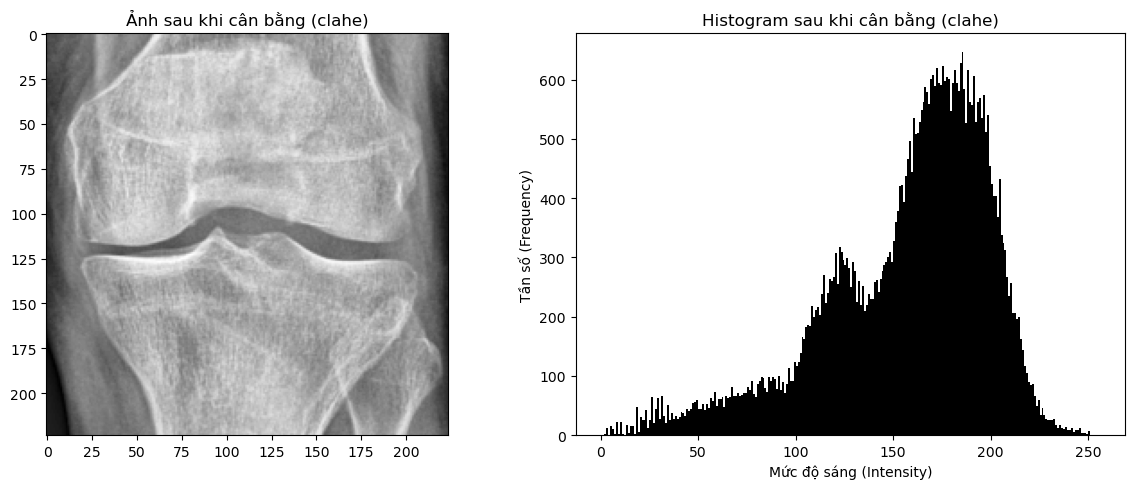

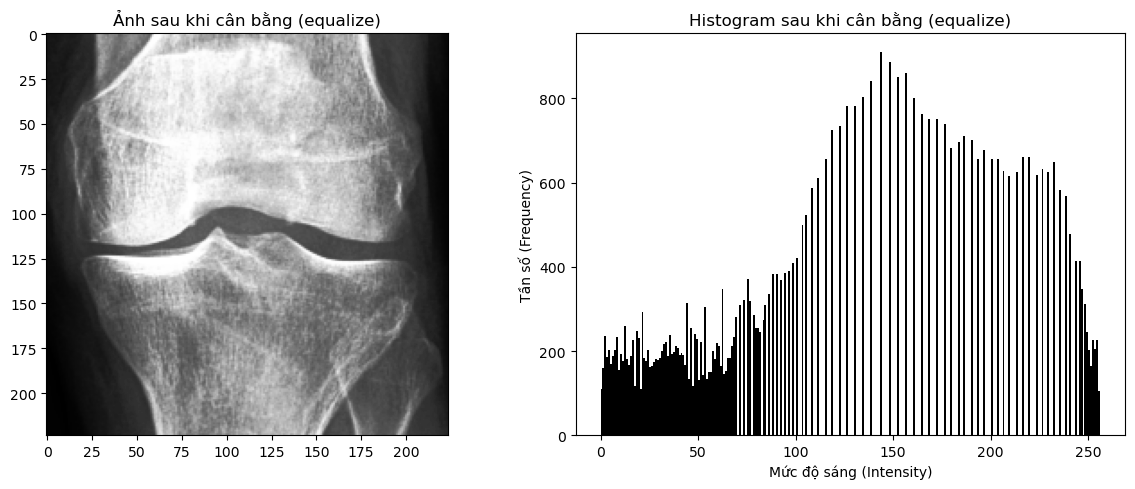

4-------------------------------------------
Image: 9057150R.png
Shape: (224, 224, 3)
Size: 21.52 KB (22033 bytes)


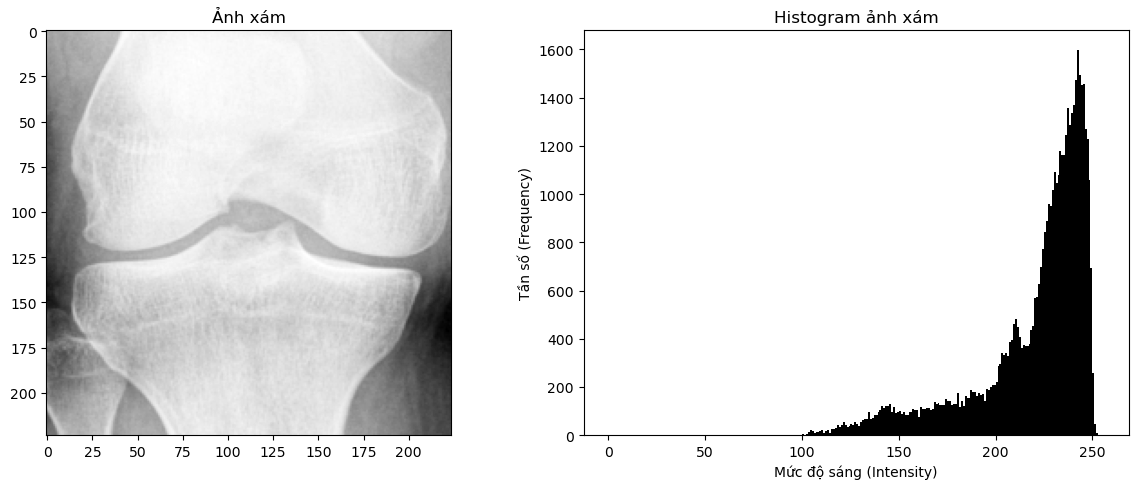

Shape: (224, 224)


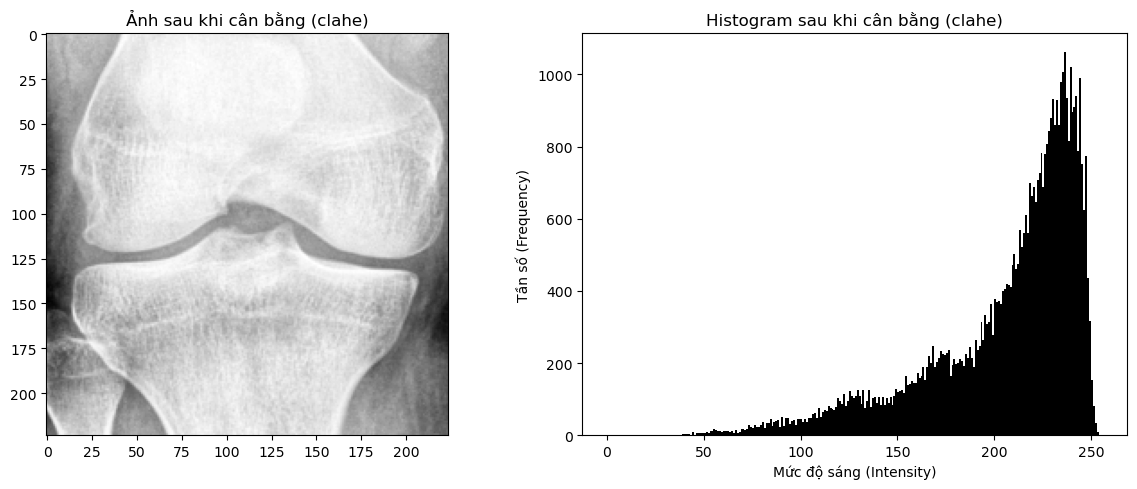

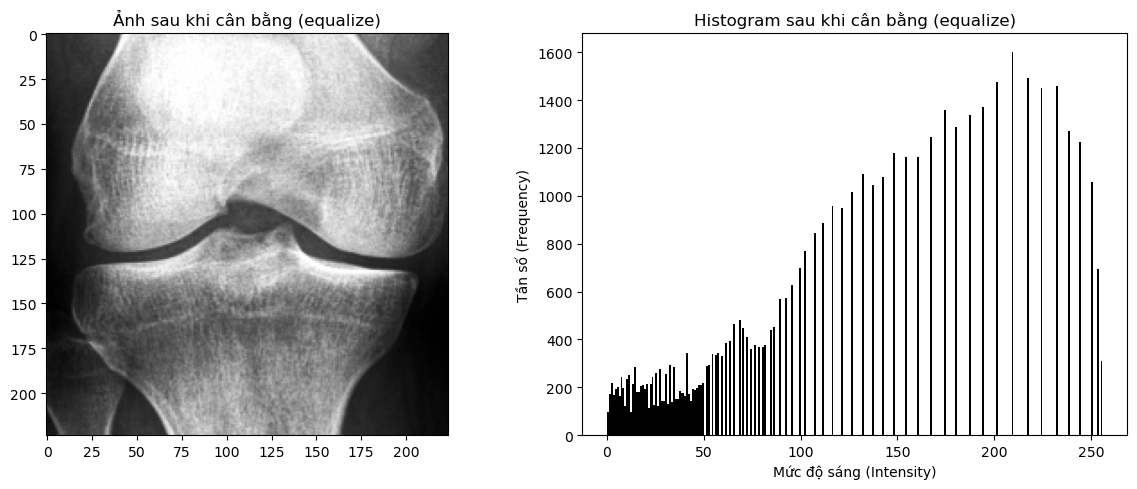

5-------------------------------------------
Image: 9057479L.png
Shape: (224, 224, 3)
Size: 20.81 KB (21309 bytes)


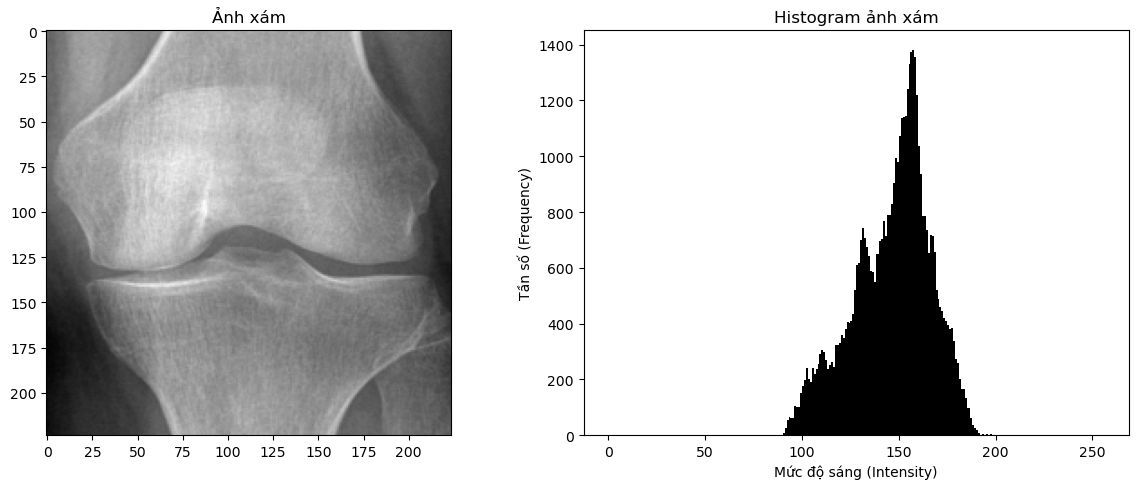

Shape: (224, 224)


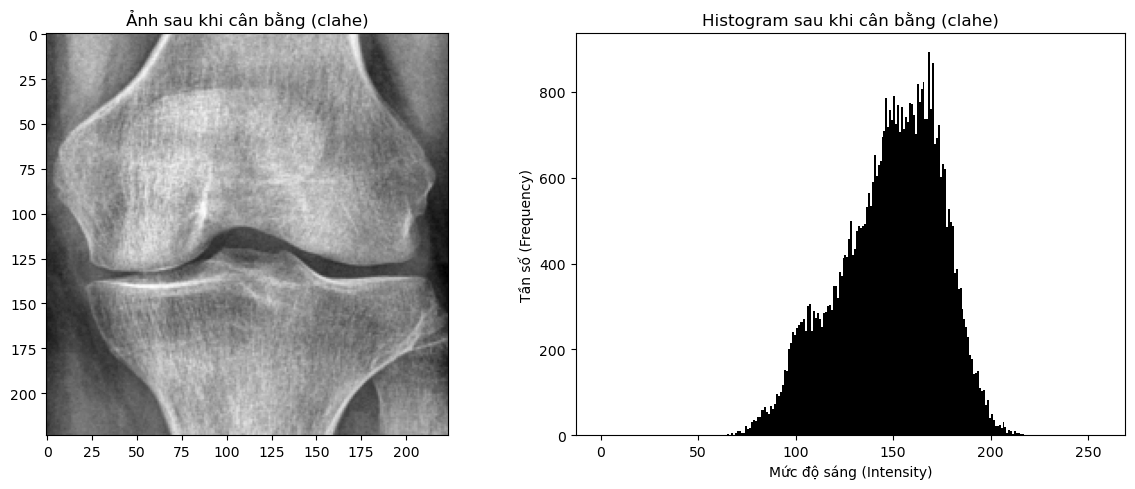

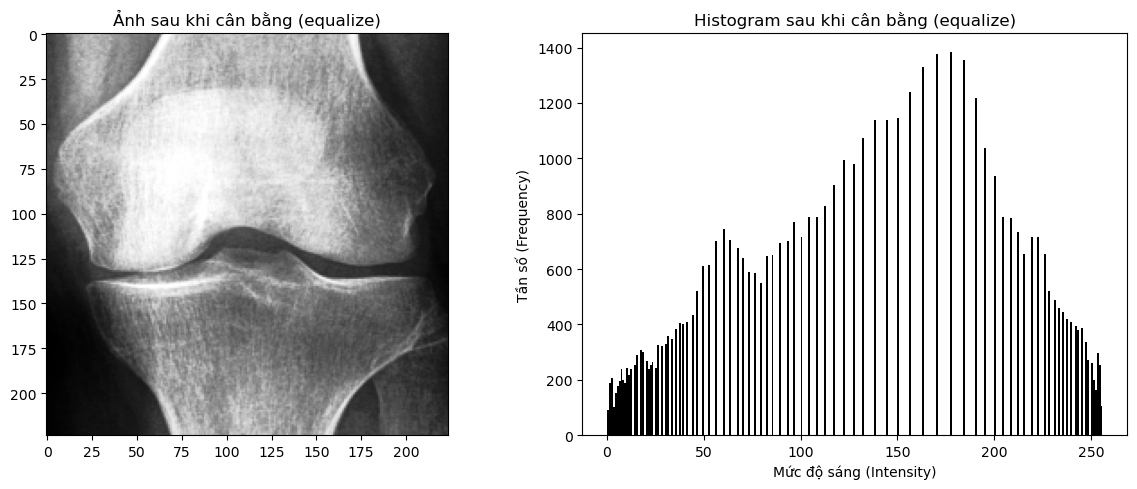

In [29]:
display_images_info('oa_doubtful', 5, equalization_method="clahe")